In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(7)

In [38]:
def calc_pcap(x):
    return st.norm.pdf(x, loc = 20, scale = 10) + st.norm.pdf(x, 50, 5) + st.norm.pdf(x, 80, 20)

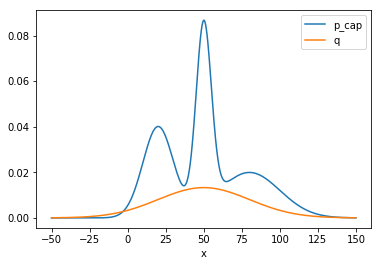

In [39]:
x = np.linspace(-50, 150, 2000)
p_cap =calc_pcap(x)
q = st.norm.pdf(x, 50, 30)
plt.plot(x, p_cap, label = "p_cap")
plt.plot(x, q, label = "q")
plt.xlabel("x")
plt.legend()
plt.show()

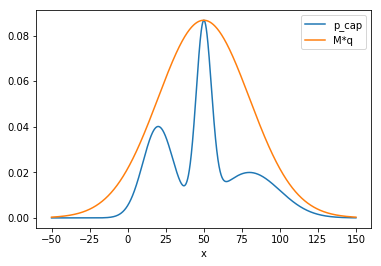

In [40]:
M = np.max(p_cap / q)
plt.plot(x, p_cap, label = "p_cap")
plt.plot(x, M*q, label = "M*q")
plt.legend()
plt.xlabel("x")
plt.show()

In [41]:
s = 0
S = 10000
t = 0
z_new = []
while s < S:
    t += 1
    z = st.norm.rvs(size = 1, loc = 50, scale = 30)
    Mq = M*st.norm.pdf(z, 50, 30)
    u = st.uniform.rvs(loc = 0, scale = Mq)
    if u < calc_pcap(z):
        s += 1
        if s % 1000 == 0: print("Samples collected : ", s)
        z_new.append(z[0])

Samples collected :  1000
Samples collected :  2000
Samples collected :  3000
Samples collected :  4000
Samples collected :  5000
Samples collected :  6000
Samples collected :  7000
Samples collected :  8000
Samples collected :  9000
Samples collected :  10000


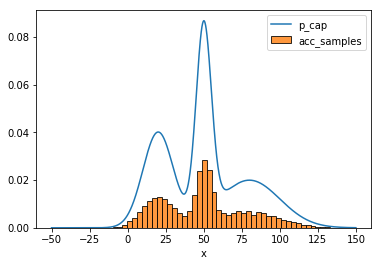

In [42]:
acc_rate = s/t
plt.plot(x, p_cap, label="p_cap")
plt.xlabel("x")
plt.hist(z_new, bins = 50, density = True, alpha = 0.8, edgecolor="black", label="acc_samples")
plt.legend()
plt.show()

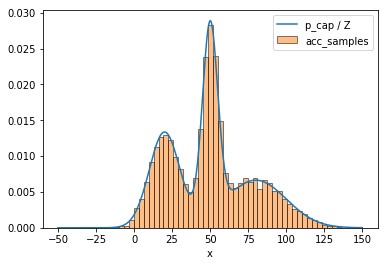

In [43]:
Z = acc_rate * M
# note that p(acc) = Z / M => Z = acc_rate * M
plt.plot(x, p_cap/Z, label = "p_cap / Z")
plt.xlabel("x")
plt.hist(z_new, bins = 50, density = True, alpha = 0.5, edgecolor = "black", label = "acc_samples")
plt.legend()
plt.show()
# fits rather well.. so acc_rate makes sense

In [44]:
print("Value of M used is", M)
print("Acceptance rate is", acc_rate)
print("Value of Z is", Z)

Value of M used is 6.521712773
Acceptance rate is 0.46051116739580933
Value of Z is 3.00332156252
